<a href="https://colab.research.google.com/github/FelipeFerAl/ControlNoLineal/blob/main/Clases/Ejercicio1CNL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def damped_pendulum(theta, omega, alpha=0.2):
  dtheta = omega
  domega = -alpha * omega - np.sin(theta)
  return dtheta, domega

# Phase space limits
theta_min, theta_max = -3*np.pi, 3*np.pi
omega_min, omega_max = -4, 4

# Grid
theta = np.linspace(theta_min, theta_max, 600)
omega = np.linspace(omega_min, omega_max, 400)
THETA, OMEGA = np.meshgrid(theta, omega)

# Vector field
dTHETA, dOMEGA = damped_pendulum(THETA, OMEGA)
dTHETA2, dOMEGA2 = damped_pendulum(THETA, OMEGA, 0.0)

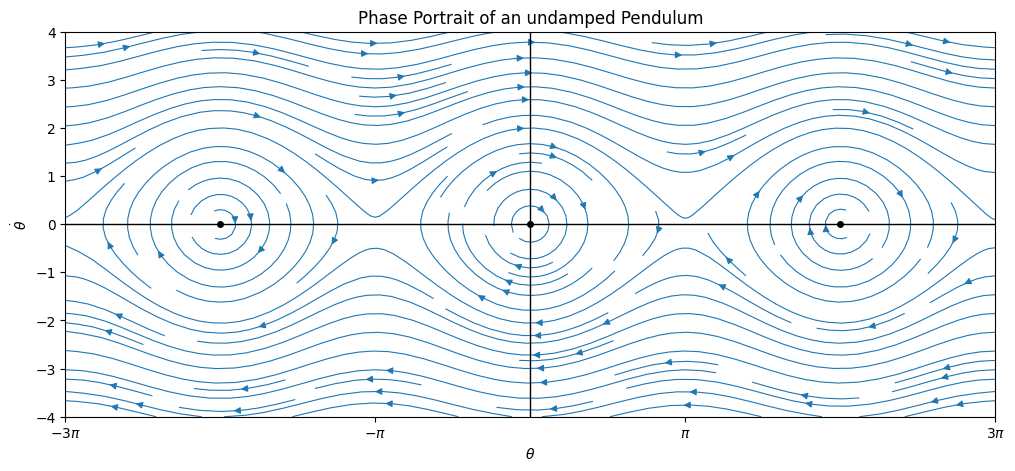

In [ ]:
#@title Undamped Version
plt.figure(figsize=(12, 5))

plt.streamplot(
    THETA, OMEGA,
    dTHETA2, dOMEGA2,
    density=1.4,
    linewidth=0.8,
    arrowsize=1
)

# Axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Ticks at multiples of π
ticks = [-3*np.pi, -np.pi, np.pi, 3*np.pi]
labels = [r"$-3\pi$", r"$-\pi$", r"$\pi$", r"$3\pi$"]

plt.xticks(ticks, labels)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")

plt.title("Phase Portrait of an undamped Pendulum")

plt.xlim(theta_min, theta_max)
plt.ylim(omega_min, omega_max)

for k in range(-3, 4):
  plt.plot(2*k*np.pi, 0, 'ko', markersize=4)

plt.grid(False)
plt.show()

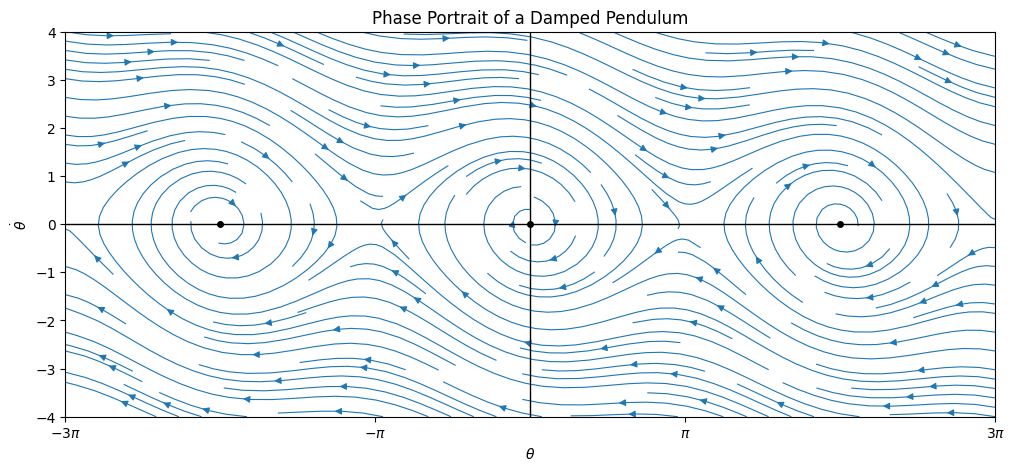

In [ ]:
#@title Damped Version
plt.figure(figsize=(12, 5))

plt.streamplot(
    THETA, OMEGA,
    dTHETA, dOMEGA,
    density=1.4,
    linewidth=0.8,
    arrowsize=1
)

# Axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Ticks at multiples of π
ticks = [-3*np.pi, -np.pi, np.pi, 3*np.pi]
labels = [r"$-3\pi$", r"$-\pi$", r"$\pi$", r"$3\pi$"]

plt.xticks(ticks, labels)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")

plt.title("Phase Portrait of a Damped Pendulum")

plt.xlim(theta_min, theta_max)
plt.ylim(omega_min, omega_max)

for k in range(-3, 4):
  plt.plot(2*k*np.pi, 0, 'ko', markersize=4)

plt.grid(False)
plt.show()

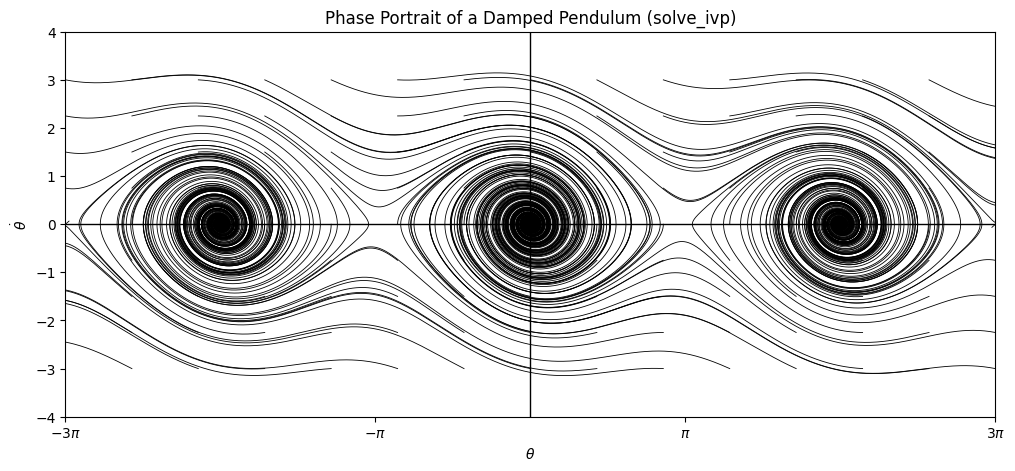

In [ ]:
#@title With solve_ivp
from scipy.integrate import solve_ivp

def pendulum(t, x, alpha=0.2):
  theta, omega = x
  dtheta = omega
  domega = -alpha * omega - np.sin(theta)
  return [dtheta, domega]

t_span = (0, 40)
t_eval = np.linspace(*t_span, 4000)

theta0_vals = np.linspace(-3*np.pi, 3*np.pi, 15)
omega0_vals = np.linspace(-3, 3, 9)

plt.figure(figsize=(12, 5))

for theta0 in theta0_vals:
  for omega0 in omega0_vals:
    sol = solve_ivp(
      pendulum,
      t_span,
      [theta0, omega0],
      t_eval=t_eval,
      rtol=1e-8,
      atol=1e-10
    )

    plt.plot(sol.y[0], sol.y[1], 'k', linewidth=0.6)

# Axes
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Ticks
ticks = [-3*np.pi, -np.pi, np.pi, 3*np.pi]
labels = [r"$-3\pi$", r"$-\pi$", r"$\pi$", r"$3\pi$"]

plt.xticks(ticks, labels)

plt.xlabel(r"$\theta$")
plt.ylabel(r"$\dot{\theta}$")
plt.title("Phase Portrait of a Damped Pendulum (solve_ivp)")

plt.xlim(-3*np.pi, 3*np.pi)
plt.ylim(-4, 4)

plt.show()

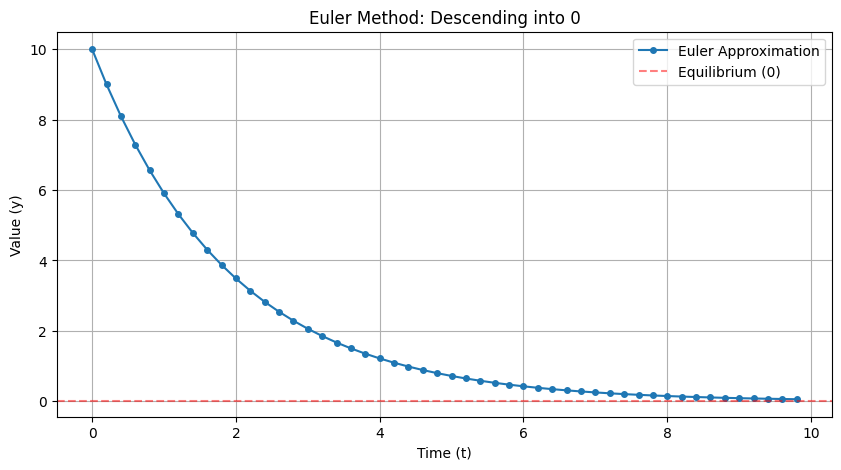

In [ ]:
#@title Time figure for Euler
# Differential equation: dy/dt = -k * y (Exponential decay toward 0)
def model(y, k):
    return -k * y

# Euler Method Parameters
y0 = 10        # Initial value
k = 0.5         # Decay constant
dt = 0.2        # Time step
t_max = 10      # Duration

t_values = np.arange(0, t_max, dt)
y_values = np.zeros(len(t_values))
y_values[0] = y0

# Euler integration loop
for i in range(1, len(t_values)):
    y_values[i] = y_values[i-1] + model(y_values[i-1], k) * dt

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(t_values, y_values, 'o-', markersize=4, label='Euler Approximation')
plt.axhline(0, color='red', linestyle='--', alpha=0.5, label='Equilibrium (0)')
plt.xlabel('Time (t)')
plt.ylabel('Value (y)')
plt.title('Euler Method: Descending into 0')
plt.legend()
plt.grid(True)
plt.show()